## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [39]:
# Checking the number of mice.
combined_data.groupby('Mouse ID').agg(['count'])

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
,count,count,count,count,count,count,count
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10


In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_df = combined_data[combined_data.duplicated(keep = 'last')]
print(Duplicate_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
908                45.0                 0  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.sort_values(["Mouse ID","Timepoint"], inplace = True)
combined_data.drop_duplicates(subset=["Mouse ID","Timepoint"], keep=False, inplace=True)
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


In [44]:
# Checking the number of mice in the clean DataFrame.
combined_data.groupby('Mouse ID').count()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combo_mean = combined_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
combo_median = combined_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
combo_variance = combined_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
combo_standard_deviation = combined_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
combo_sem = combined_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

table_mean_df = pd.DataFrame(ms_mean)
table_comp = table_mean_df.rename(columns={"Tumor Volume (mm3)": "Mean"})

table_comp.assign(Median=ms_median,Variance=ms_variance,Standard_deviation=ms_standard_deviation,SEM=ms_sem)
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
combined_data.groupby('Drug Regimen', as_index=False).agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.458254  50.854632  44.053659  6.637293  0.540135
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

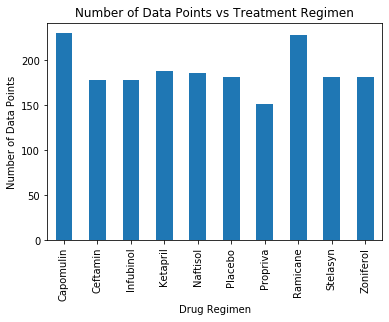

In [52]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
barpanda_data = combined_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_plot_data = barpanda_data.plot.bar(rot='vertical',title='Number of Data Points vs Treatment Regimen')

bar_plot_data.set_xlabel("Drug Regimen")
bar_plot_data.set_ylabel("Number of Data Points")


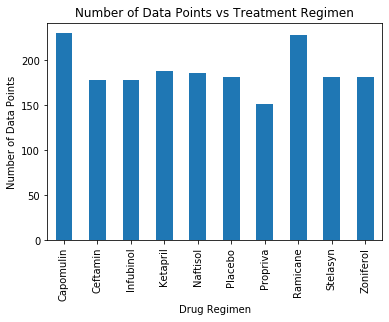

In [53]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bar_data = combined_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_data_df = pd.DataFrame(bar_data)

plt.xdata = bar_data_df.plot.bar(legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points vs Treatment Regimen')

plt.show()

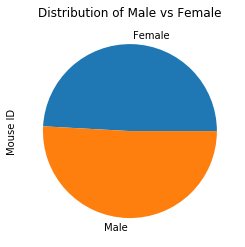

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = combined_data.groupby('Sex').count()['Mouse ID']
pieplot = gender.plot.pie(y='Sex',title='Distribution of Male vs Female')

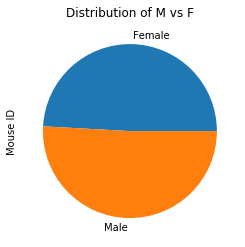

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = combined_data.groupby('Sex').count()['Mouse ID']
gender_df = pd.DataFrame(gender)
gender_df 

plt.pie(gender,labels=gender.index);
plt.title('Distribution of M vs F')
plt.ylabel('Mouse ID')
plt.show()


## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
cap_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
ram_df = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane", :]
inf_df = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol", :]
ceft_df = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin", :]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_max = cap_df.groupby('Mouse ID').max()['Timepoint']
cap_max_df = pd.DataFrame(cap_max)
cap_max_merge = pd.merge(cap_max_df,combined_data,on=("Mouse ID","Timepoint"),how="left")
cap_max_merge.head()

ram_max = ram_df.groupby('Mouse ID').max()['Timepoint']
ram_max_df = pd.DataFrame(ram_max)
ram_max_merge = pd.merge(ram_max_df,combined_data,on=("Mouse ID","Timepoint"),how="left")
ram_max_merge.head()

inf_max = inf_df.groupby('Mouse ID').max()['Timepoint']
inf_max_df = pd.DataFrame(inf_max)
inf_max_merge = pd.merge(inf_max_df,combined_data,on=("Mouse ID","Timepoint"),how="left")
inf_max_merge.head()

ceft_max = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceft_max_df = pd.DataFrame(ceft_max)
ceft_max_merge = pd.merge(ceft_max_df,combined_data,on=("Mouse ID","Timepoint"),how="left")
ceft_max_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [57]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    #Capomulin outliers
cap_tumors = cap_max_merge["Tumor Volume (mm3)"]

cap_quartiles = cap_tumors.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers could be values below {cap_lower_bound} and above {cap_upper_bound}.")

    #Ramicane Outliers 
ram_tumors = ram_max_merge["Tumor Volume (mm3)"]

ram_quartiles = ram_tumors.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane potential outliers could be values below {ram_lower_bound} and above {ram_upper_bound}.")

    #Infubinol Outliers
inf_tumors = inf_max_merge["Tumor Volume (mm3)"]

inf_quartiles = inf_tumors.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol potential outliers could be values below {inf_lower_bound} and above {inf_upper_bound}.")

    #Ceftamin Outliers
ceft_tumors = ceft_max_merge["Tumor Volume (mm3)"]

ceft_quartiles = ceft_tumors.quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq

ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
print(f"Ceftamin potential outliers could be values below {ceft_lower_bound} and above {ceft_upper_bound}.")
    

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549.
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135.
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001.
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999.


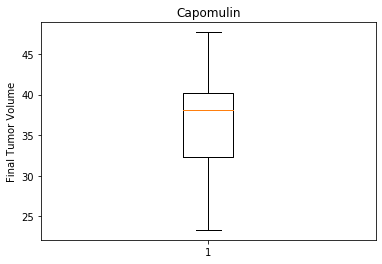

In [58]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Cap Box Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(cap_tumors)
plt.show()

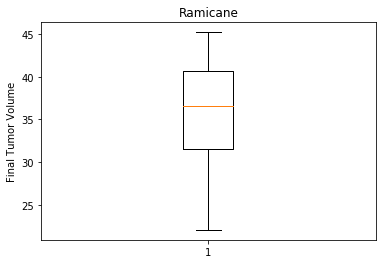

In [59]:
#Ram Box Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(ram_tumors)
plt.show()

## Line and Scatter Plots

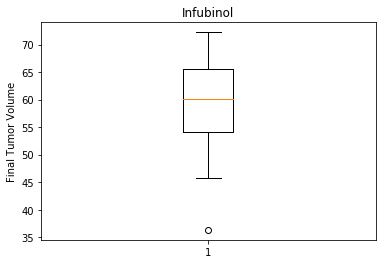

In [60]:
#Inf Box Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(inf_tumors)
plt.show()

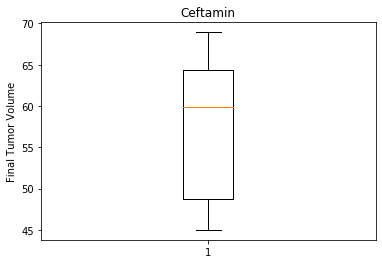

In [61]:
#Ceft Box Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(ceft_tumors)
plt.show()

In [62]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = cap_df.loc[cap_df["Mouse ID"] == "s185",:]
line_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


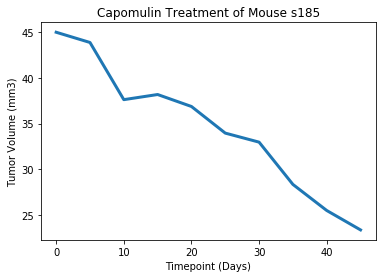

In [63]:
x_axis_tp = line_df["Timepoint"]
tv = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin Treatment of Mouse s185')
plt.plot(x_axis_tp,tv,linewidth=3, markersize=15)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('lineplotchart')
plt.show()

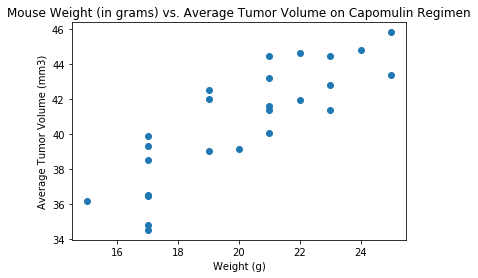

In [64]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df_average = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_df_average['Weight (g)'],cap_df_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight (in grams) vs. Average Tumor Volume on Capomulin Regimen')
plt.savefig('scatterplotaverage')
plt.show()

## Correlation and Regression

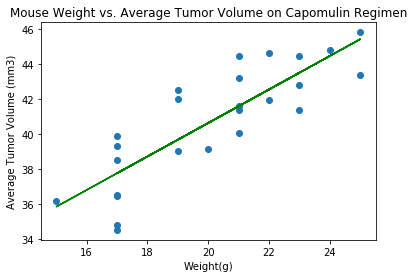

In [65]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
regression_model=st.linregress(cap_df_average['Weight (g)'],cap_df_average['Tumor Volume (mm3)'])
regression_model

regression_slope = 0.9544396890241045 
regression_intercept= 21.552160532685015

y_values = cap_df_average['Weight (g)']*regression_slope+regression_intercept
plt.scatter(cap_df_average['Weight (g)'],cap_df_average['Tumor Volume (mm3)'])

plt.plot(cap_df_average['Weight (g)'],y_values,color="green")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume on Capomulin Regimen')

plt.savefig('linregression')
plt.show()
